In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")
gc = pd.read_csv("C:\\Users\\Vaibhav\\Desktop\\03June\\DataSciencePy\\Datasets\\German_credit_classification.csv")
#German Credit Dataset 
#Whether a person will default on the credit or not - y variable is Default
#Step1. Data Exploration and Data Visualization
df = pd.DataFrame(gc)

In [9]:
gc.head(3)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201


---

### HANDLING NULL VALUES USING IMPUTER CLASS

In [10]:
#check for missing values in data
#since there are no missing values in the data so inserting missing values in the data
gc.age[5] = np.nan
gc.age[8:10] = np.nan
gc.duration[20] = np.nan
gc.isnull().sum()

Default            0
checkingstatus1    0
duration           1
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                3
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

In [11]:
#impute the missing values using imputer class in preprocessing module of sklearn library
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean', axis = 0)
gc.loc[:, ['duration','age']] = imputer.fit_transform(gc.loc[:, ['duration','age']])
#gc = imputer.fit_transform(gc) throws error since imputer class works only on numerical data

In [12]:
np.sum(gc[['duration','age']].isnull()) #the values of both the cols have been imputed with their respective means

duration    0
age         0
dtype: int64

----

### Creating dummy variables using pd.get_dummies

In [13]:
table = pd.crosstab(gc.checkingstatus1, gc.Default)
table = np.array(table)
pd.DataFrame(table/np.sum(table, axis = 1).reshape(-1,1), columns= ["Non-Default_Rate", "Default_Rate"])

,Non-Default_Rate,Default_Rate
0,0.507299,0.492701
1,0.609665,0.390335
2,0.777778,0.222222
3,0.883249,0.116751


In [14]:
#check for all the categorical variables

In [15]:
cat_vars = ['checkingstatus1', 'history', 'purpose', 'savings', 'employ', 'status', \
            'others', 'property', 'otherplans', 'housing','job','tele','foreign']

In [16]:
#Create dummies for the categorical columns
for cat in cat_vars:
    dummy = pd.get_dummies(gc[cat], prefix = cat+'_')#drop_first=True)
    gc = pd.concat([gc,dummy], axis = 1)
print(gc.columns)
print(gc.shape)
gc.to_csv("dummy_German.csv")

Index(['Default', 'checkingstatus1', 'duration', 'history', 'purpose',
       'amount', 'savings', 'employ', 'installment', 'status', 'others',
       'residence', 'property', 'age', 'otherplans', 'housing', 'cards', 'job',
       'liable', 'tele', 'foreign', 'checkingstatus1__A11',
       'checkingstatus1__A12', 'checkingstatus1__A13', 'checkingstatus1__A14',
       'history__A30', 'history__A31', 'history__A32', 'history__A33',
       'history__A34', 'purpose__A40', 'purpose__A41', 'purpose__A410',
       'purpose__A42', 'purpose__A43', 'purpose__A44', 'purpose__A45',
       'purpose__A46', 'purpose__A48', 'purpose__A49', 'savings__A61',
       'savings__A62', 'savings__A63', 'savings__A64', 'savings__A65',
       'employ__A71', 'employ__A72', 'employ__A73', 'employ__A74',
       'employ__A75', 'status__A91', 'status__A92', 'status__A93',
       'status__A94', 'others__A101', 'others__A102', 'others__A103',
       'property__A121', 'property__A122', 'property__A123', 'property__A124'

In [17]:
gc.drop(cat_vars, axis = 1, inplace=True)
gc.shape

(1000, 62)

---

### Dummy variable encoding using LabelEncoder and OneHotEncoder

In [18]:
#label encoding - this will transfor the char level values to numeric
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for cat in cat_vars:
    df.loc[:, cat] = encode.fit_transform(df.loc[:,cat])
print(df[cat_vars].head(3))
print(df.shape)

   checkingstatus1  history  purpose  savings  employ  status  others  \
0                0        4        4        4       4       2       0   
1                1        2        4        0       2       1       0   
2                3        4        7        0       3       2       0   

   property  otherplans  housing  job  tele  foreign  
0         0           2        1    2     1        0  
1         0           2        1    2     0        0  
2         0           2        1    1     0        0  
(1000, 21)


In [19]:
for cat in cat_vars:
    print(df.groupby(cat)['Default'].count(),"\n") #we can count any column

checkingstatus1
0    274
1    269
2     63
3    394
Name: Default, dtype: int64 

history
0     40
1     49
2    530
3     88
4    293
Name: Default, dtype: int64 

purpose
0    234
1    103
2     12
3    181
4    280
5     12
6     22
7     50
8      9
9     97
Name: Default, dtype: int64 

savings
0    603
1    103
2     63
3     48
4    183
Name: Default, dtype: int64 

employ
0     62
1    172
2    339
3    174
4    253
Name: Default, dtype: int64 

status
0     50
1    310
2    548
3     92
Name: Default, dtype: int64 

others
0    907
1     41
2     52
Name: Default, dtype: int64 

property
0    282
1    232
2    332
3    154
Name: Default, dtype: int64 

otherplans
0    139
1     47
2    814
Name: Default, dtype: int64 

housing
0    179
1    713
2    108
Name: Default, dtype: int64 

job
0     22
1    200
2    630
3    148
Name: Default, dtype: int64 

tele
0    596
1    404
Name: Default, dtype: int64 

foreign
0    963
1     37
Name: Default, dtype: int64 



In [20]:
#removing tele and foreign cat columns since they are binary
cat_vars = [x for x in cat_vars if x not in ['tele', 'foreign']]
cat_vars

['checkingstatus1',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'job']

In [21]:
df.shape

(1000, 21)

In [22]:
cn = np.where(df.columns.isin(cat_vars))
cn
df.columns[cn]

Index(['checkingstatus1', 'history', 'purpose', 'savings', 'employ', 'status',
       'others', 'property', 'otherplans', 'housing', 'job'],
      dtype='object')

In [23]:
#Now we'll do one hot encoding of all the categorical columns except tele and foreign
from sklearn.preprocessing import OneHotEncoder
#for i in range(len(cat_array)):
ohe = OneHotEncoder(categorical_features=[cn])
df_array=ohe.fit_transform(df).toarray()

In [24]:
print(df.shape)
print(df_array.shape)
print(gc.shape) #this has 2 extra columns tele and foreign

(1000, 21)
(1000, 60)
(1000, 62)


----

In [25]:
### creating a copy of df

In [26]:
gc.iloc[:,9:].head(2)
gc_copy = gc.copy() #creating a copy of df 
df = gc.copy()
id(df), id(gc), id(gc_copy)

(2778670053304, 2778669853608, 2778670053080)

-----

#### Split the data into Train(Development) and Test (Validation)

In [27]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(gc, test_size = 0.30, random_state = 2) #random seed
X_train = train.drop(['Default'], axis = 1)
y_train = train['Default']

X_test = test.drop(['Default'], axis = 1)
y_test = test['Default']
train.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A11,checkingstatus1__A12,...,housing__A152,housing__A153,job__A171,job__A172,job__A173,job__A174,tele__A191,tele__A192,foreign__A201,foreign__A202
90,0,12.0,618,4,4,56.0,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
305,0,6.0,1543,4,2,33.0,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0


In [28]:
train.Default.value_counts()

0    499
1    201
Name: Default, dtype: int64

---

In [29]:
from sklearn import preprocessing as pp

In [30]:
#Method1 of scaling
train_std = pp.scale(train.drop('Default', axis = 1))
test_std = pp.scale(test.drop('Default', axis = 1))

In [31]:
train.head(1)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A11,checkingstatus1__A12,...,housing__A152,housing__A153,job__A171,job__A172,job__A173,job__A174,tele__A191,tele__A192,foreign__A201,foreign__A202
90,0,12.0,618,4,4,56.0,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0


In [32]:
#Method 2 of scaling
scaler = pp.StandardScaler()
scaler.fit(train.drop('Default', axis = 1))
train_std = scaler.transform(train.drop('Default', axis = 1))
test_std =scaler.transform(test.drop('Default', axis = 1))

In [33]:
print(train_std[0,:5])
print(test_std[0,:5])

[-0.70642969 -0.93138352  0.91950968  1.03243719  1.79763904]
[-0.19855487 -0.39096756  0.91950968 -0.79719834  0.13552066]


In [34]:
#Method 3: Min Max scaling: (x - min(x))/(max(x)-min(x))
minmaxscaler = pp.MinMaxScaler()
train_sc = minmaxscaler.fit_transform(train.drop('Default', axis = 1))
test_sc =minmaxscaler.transform(test.drop('Default', axis = 1))
test_sc[0,:5] #values bet 0 and 1

array([0.25      , 0.10179377, 1.        , 0.33333333, 0.32142857])

In [35]:
train.Default.shape, train_sc.shape

((700,), (700, 61))

In [36]:
train_sc = np.c_[train.Default.values, train_sc]


In [37]:
test.Default.shape, test_sc.shape

((300,), (300, 61))

In [38]:
test_sc = np.c_[test.Default.values, test_sc]

In [39]:
train.columns

Index(['Default', 'duration', 'amount', 'installment', 'residence', 'age',
       'cards', 'liable', 'checkingstatus1__A11', 'checkingstatus1__A12',
       'checkingstatus1__A13', 'checkingstatus1__A14', 'history__A30',
       'history__A31', 'history__A32', 'history__A33', 'history__A34',
       'purpose__A40', 'purpose__A41', 'purpose__A410', 'purpose__A42',
       'purpose__A43', 'purpose__A44', 'purpose__A45', 'purpose__A46',
       'purpose__A48', 'purpose__A49', 'savings__A61', 'savings__A62',
       'savings__A63', 'savings__A64', 'savings__A65', 'employ__A71',
       'employ__A72', 'employ__A73', 'employ__A74', 'employ__A75',
       'status__A91', 'status__A92', 'status__A93', 'status__A94',
       'others__A101', 'others__A102', 'others__A103', 'property__A121',
       'property__A122', 'property__A123', 'property__A124',
       'otherplans__A141', 'otherplans__A142', 'otherplans__A143',
       'housing__A151', 'housing__A152', 'housing__A153', 'job__A171',
       'job__A172',

In [40]:
train = pd.DataFrame(train_sc, columns = train.columns)

In [41]:
test= pd.DataFrame(test_sc, columns = test.columns)

In [42]:
train.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A11,checkingstatus1__A12,...,housing__A152,housing__A153,job__A171,job__A172,job__A173,job__A174,tele__A191,tele__A192,foreign__A201,foreign__A202
0,0.0,0.142857,0.020249,1.0,1.000000,0.660714,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.035714,0.071146,1.0,0.333333,0.250000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [43]:
test.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A11,checkingstatus1__A12,...,housing__A152,housing__A153,job__A171,job__A172,job__A173,job__A174,tele__A191,tele__A192,foreign__A201,foreign__A202
0,1.0,0.250000,0.101794,1.000000,0.333333,0.321429,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.196429,0.058655,0.333333,0.333333,0.500000,0.333333,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


---

### Creating a logistic regression model

In [44]:
from statsmodels.formula.api import glm ## Generalized logistic Regression
import statsmodels.api as sm #family: binary - statsmodels.api.family

In [45]:
train.columns

Index(['Default', 'duration', 'amount', 'installment', 'residence', 'age',
       'cards', 'liable', 'checkingstatus1__A11', 'checkingstatus1__A12',
       'checkingstatus1__A13', 'checkingstatus1__A14', 'history__A30',
       'history__A31', 'history__A32', 'history__A33', 'history__A34',
       'purpose__A40', 'purpose__A41', 'purpose__A410', 'purpose__A42',
       'purpose__A43', 'purpose__A44', 'purpose__A45', 'purpose__A46',
       'purpose__A48', 'purpose__A49', 'savings__A61', 'savings__A62',
       'savings__A63', 'savings__A64', 'savings__A65', 'employ__A71',
       'employ__A72', 'employ__A73', 'employ__A74', 'employ__A75',
       'status__A91', 'status__A92', 'status__A93', 'status__A94',
       'others__A101', 'others__A102', 'others__A103', 'property__A121',
       'property__A122', 'property__A123', 'property__A124',
       'otherplans__A141', 'otherplans__A142', 'otherplans__A143',
       'housing__A151', 'housing__A152', 'housing__A153', 'job__A171',
       'job__A172',

In [46]:
' + '.join(train.drop('Default',axis = 1).columns)

'duration + amount + installment + residence + age + cards + liable + checkingstatus1__A11 + checkingstatus1__A12 + checkingstatus1__A13 + checkingstatus1__A14 + history__A30 + history__A31 + history__A32 + history__A33 + history__A34 + purpose__A40 + purpose__A41 + purpose__A410 + purpose__A42 + purpose__A43 + purpose__A44 + purpose__A45 + purpose__A46 + purpose__A48 + purpose__A49 + savings__A61 + savings__A62 + savings__A63 + savings__A64 + savings__A65 + employ__A71 + employ__A72 + employ__A73 + employ__A74 + employ__A75 + status__A91 + status__A92 + status__A93 + status__A94 + others__A101 + others__A102 + others__A103 + property__A121 + property__A122 + property__A123 + property__A124 + otherplans__A141 + otherplans__A142 + otherplans__A143 + housing__A151 + housing__A152 + housing__A153 + job__A171 + job__A172 + job__A173 + job__A174 + tele__A191 + tele__A192 + foreign__A201 + foreign__A202'

In [47]:
features = ' + '.join(train.drop('Default',axis = 1).columns)

In [48]:
'Default ~ '+features

'Default ~ duration + amount + installment + residence + age + cards + liable + checkingstatus1__A11 + checkingstatus1__A12 + checkingstatus1__A13 + checkingstatus1__A14 + history__A30 + history__A31 + history__A32 + history__A33 + history__A34 + purpose__A40 + purpose__A41 + purpose__A410 + purpose__A42 + purpose__A43 + purpose__A44 + purpose__A45 + purpose__A46 + purpose__A48 + purpose__A49 + savings__A61 + savings__A62 + savings__A63 + savings__A64 + savings__A65 + employ__A71 + employ__A72 + employ__A73 + employ__A74 + employ__A75 + status__A91 + status__A92 + status__A93 + status__A94 + others__A101 + others__A102 + others__A103 + property__A121 + property__A122 + property__A123 + property__A124 + otherplans__A141 + otherplans__A142 + otherplans__A143 + housing__A151 + housing__A152 + housing__A153 + job__A171 + job__A172 + job__A173 + job__A174 + tele__A191 + tele__A192 + foreign__A201 + foreign__A202'

In [49]:
features = ' + '.join(train.columns[1:])

In [50]:
## creating model based on 1 Independent Variable
mod_log = glm(formula ='Default ~ duration', 
              data = train, 
              family = sm.families.Binomial())
#glm is a family for response variable: binomial distribution, bernoulli distribution, poisson distribution
## fitting the model
mod_fit = mod_log.fit()
## getting the summary
mod_fit.summary()
#Deviance: how different is the model from reality; Higher the deviance, worse the model. 
#Compare deviance between the models to understand which model is better

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      698
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.23
Date:                Wed, 19 Jun 2019   Deviance:                       818.47
Time:                        14:19:44   Pearson chi2:                     698.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4501      0.150     -9.684      0.000      -1.744      -1.157
duration       1.7632      0.386      4.562      0.000       1.006       2.521
==============================================================================
"""

In [51]:
mod_log = glm(formula ='Default ~'+features, 
              data = train, 
              family = sm.families.Binomial())
## fitting the model
mod_fit = mod_log.fit()
## getting the summary
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      651
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -299.98
Date:                Wed, 19 Jun 2019   Deviance:                       599.95
Time:                        14:19:44   Pearson chi2:                     679.
No. Iterations:                    13   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7219      0.158     -4.560      0.000      -1.032      -0.412
duration                 1.3745      0.661      2.078      0.038       0.078       2.671
amount                   2.3517      1.052      2.236      0.025       0.290       4.413
installment              0.9643      0.330      2.924      0.003       0.318       1.611
residence                0.2531      0.323      0.784      0.433      -0.380       0.886
age                     -0.8242      0.641     -1.285      0.199      -2.081       0.433
cards                   -0.0496      0.782     -0.063      0.949      -1.582       1.483
liable                   0.5393      0.297      1.818      0.069      -0.042       1.121
checkingstatus1__A11     0.6925      0.202      3.420      0.001       0.296       1.089
checkingstatus1__A12     0.4682      0.208      2.246      0.025       0.060       0.877
checkingstatus1__A13    -1.0239      0.409     -2.502      0.012      -1.826      -0.222
checkingstatus1__A14    -0.8586      0.219     -3.916      0.000      -1.288      -0.429
history__A30             0.3136      0.427      0.734      0.463      -0.524       1.151
history__A31             0.3075      0.391      0.787      0.432      -0.459       1.074
history__A32            -0.1244      0.221     -0.564      0.573      -0.557       0.308
history__A33            -0.3683      0.314     -1.172      0.241      -0.984       0.248
history__A34            -0.8502      0.258     -3.295      0.001      -1.356      -0.345
purpose__A40             0.6550      0.265      2.474      0.013       0.136       1.174
purpose__A41            -1.5638      0.475     -3.294      0.001      -2.494      -0.633
purpose__A410           -0.6311      0.821     -0.769      0.442      -2.239       0.977
purpose__A42            -0.1136      0.292     -0.388      0.698      -0.687       0.460
purpose__A43            -0.2497      0.281     -0.889      0.374      -0.800       0.301
purpose__A44             0.3835      0.716      0.535      0.592      -1.020       1.787
purpose__A45             0.9914      0.600      1.651      0.099      -0.185       2.168
purpose__A46             0.4319      0.438      0.985      0.324      -0.427       1.291
purpose__A48            -0.5123      1.127     -0.455      0.649      -2.720       1.696
purpose__A49            -0.1131      0.386     -0.293      0.770      -0.869       0.643
savings__A61             0.4277      0.203      2.106      0.035       0.030       0.826
savings__A62             0.1179      0.314      0.375      0.708      -0.498       0.734
savings__A63            -0.0088      0.413     -0.021      0.983      -0.818       0.801
savings__A64            -0.6210      0.493     -1.259      0.208      -1.588       0.346
savings__A65            -0.6376      0.291     -2.190      0.028      -1.208      -0.067
employ__A71              0.2644      0.380     

In [52]:
#there was only 1 variable called checking status
#these are dummy variables for categorical variables (lin. regression / logistic reg) using one hot encodings

In [53]:
mod_fit.aic, mod_fit.deviance
#Deviance is a measure of goodness of fit of a model. Higher numbers always indicates bad fit. 
#The null deviance shows how well the response variable is predicted by a model that includes 
#only the intercept (grand mean) where as residual with inclusion of independent variables.

(697.9548847660388, 599.9548847660387)

In [54]:
#Predicting probability on training data
ypredtrain = mod_fit.predict()
ypredtrain[:4]

array([0.01965679, 0.05809028, 0.36675054, 0.07661453])

In [55]:
#Predicting probability on test data
# predict the prob of 1 --> prob of person defaulting
prob = mod_fit.predict(test)
print(prob[:3])

0    0.143881
1    0.040057
2    0.139259
dtype: float64


In [56]:
test['prob']= prob

In [57]:
## classifying these prob into 0 and 1 classes 
threshold = 0.5 ## prob is <0.5 ===> 0 >= 0.5 class ===> 1
y_class =[]
for i in prob:
    if i<threshold:
        y_class.append(0)
    else:
        y_class.append(1)

In [58]:
print(y_class)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [59]:
#or we can also define a class conversion fn which can be applied on each of the prob value
def class_conversion(prob):
    if prob >= 0.5:
        return 1
    else :
        return 0

In [60]:
test['class_label'] = test['prob'].apply(class_conversion)

In [61]:
test[['Default','class_label']].head(3)

,Default,class_label
0,1.0,0
1,0.0,0
2,1.0,0


In [62]:
## confusion Matrix

## Actual Vs Predicted

pd.crosstab(test.class_label,test.Default) #predicted values in rows and actual values in columns

Default,0.0,1.0
class_label,,
0,172,54
1,29,45


In [63]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score

In [64]:
tab = pd.DataFrame(confusion_matrix(test.class_label,test.Default)) #predicted value and actual value
tab

,0,1
0,172,54
1,29,45


In [65]:
Accuracy = (173+44)/300 *100

Alternative method

In [66]:
accuracy_score(test.class_label,test.Default)*100

72.33333333333334

In [67]:
TP = tab.iloc[1,1] ## true positives --> positive outcome correctly(True) identified
TN = tab.iloc[0,0]
FP = tab.iloc[1,0]
FN = tab.iloc[0, 1]

### Classfication Model Evaluation Metrics

#### 1. Accuracy  = (TP + TN) / (total No)
#### 2. Sensitivity --- Recall -- TPR = TP /(TP +FN)
#### 3. Specifictity -- TNR = TN /(TN+FP)
#### 4. Precision -- PPV  = TP / (TP +FP)
#### 5. NPV   = TN / (TN+FN) - Negative prediction value


In [68]:
Accuracy = (TP + TN)/(TP+TN+FP+FN)
Accuracy*100

72.33333333333334

In [69]:
Sensitivity = TP /(TP +FN)
Specifictity =  TN /(TN+FP)
Precision = TP / (TP +FP)
NPV = TN / (TN+FN) #- Negative Predictive Value

In [70]:
import numpy as np
np.array([Sensitivity,Specifictity,Precision,NPV])*100

array([45.45454545, 85.5721393 , 60.81081081, 76.10619469])

In [71]:
## classifying these prob into 0 and 1 classes 
#since it's critical for us to reduce the false negative (incorrect prediction of non-default cases, 
#we may want to reduce the threshold) - this will increase the sensitivity score
threshold = 0.3 ## prob is <0.5 ===> 0 >= 0.5 class ===> 1
y_class =[]
for i in prob:
    if i< threshold:
        y_class.append(0)
    else:
        y_class.append(1)
test["Predict_class"] = y_class

In [72]:
tab = pd.crosstab(test.Predict_class,test.Default)
tab = pd.DataFrame(tab)
tab

Default,0.0,1.0
Predict_class,,
0,157,33
1,44,66


In [73]:
TP = tab.iloc[1,1] ## true positives --> positive outcome correctly(True) identified
TN = tab.iloc[0,0]
FP = tab.iloc[1,0]
FN = tab.iloc[0, 1]

In [74]:
Sensitivity = TP /(TP +FN)
Specifictity =  TN /(TN+FP)
Precision = TP / (TP +FP)
NPV = TN / (TN+FN)
import numpy as np
np.array([Sensitivity,Specifictity,Precision,NPV])*100

array([66.66666667, 78.10945274, 60.        , 82.63157895])

In [75]:
Accuracy = (TP + TN)/(TP+TN+FP+FN)
Accuracy*100

74.33333333333333

#### Direct method for metrics

In [76]:
import sklearn.metrics as skm
#skm.
#metrics like: confusion matrix, accuracy_score, classification_report

In [77]:
cf = confusion_matrix(test["Default"], test.Predict_class)
cf 

array([[157,  44],
       [ 33,  66]], dtype=int64)

In [78]:
(172+45)/(172+29+54+45)

0.7233333333333334

In [79]:
round(accuracy_score(test["Default"], test.Predict_class)*100,2)

74.33

In [80]:
#f1_score(accuracy_score(test["Default"], test.Predict_class)

In [81]:
Sensitivity = TP /(TP +FN)
Specifictity =  TN /(TN+FP)
Precision = TP / (TP +FP)
NPV = TN / (TN+FN)
import numpy as np
np.array([Sensitivity,Specifictity,Precision,NPV])*100

array([66.66666667, 78.10945274, 60.        , 82.63157895])

In [82]:
print(classification_report(test.Default, test.Predict_class,digits = 3))#as explained:

             precision    recall  f1-score   support

        0.0      0.826     0.781     0.803       201
        1.0      0.600     0.667     0.632        99

avg / total      0.752     0.743     0.746       300



In [83]:
#Classification Report explained:
#In the example above, we would consider true and false '0' and true and 
#false '1'. Therefore a true positive is when the actual class is positive as 
#is the estimated class. A false positive is when the actual class is negative 
#but the estimated class is positive. 
#Note: Precision for 1 in classification report is same as the precision value we calculated

In [84]:
skm.precision_recall_fscore_support(test.Default, test.Predict_class)

(array([0.82631579, 0.6       ]),
 array([0.78109453, 0.66666667]),
 array([0.80306905, 0.63157895]),
 array([201,  99], dtype=int64))

#### To get the confusion matrix for test data:

In [85]:
test["Default"].value_counts()

0.0    201
1.0     99
Name: Default, dtype: int64

In [86]:
skm.f1_score(test.Default, test.Predict_class)

0.631578947368421

#### Grid SearchCV
Grid search can't be implemented for statsmodel, only for sklearn

In [87]:
from sklearn.linear_model import LogisticRegression
lore = LogisticRegression()
lore.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
lore.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [89]:
np.logspace(-5, 8, 15)  #starting from 10 pow -5 to 10 pow 8 - 15 values are required

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])

In [90]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space}
grid = GridSearchCV(lore, param_grid=param_grid, cv = 10, scoring = 'recall', n_jobs = -1, verbose = 0)
#Most common scoring techniques on accuracy, precision, recall, f1, roc_auc

In [91]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [92]:
grid.best_params_ #best parameter of depth

{'C': 3.727593720314938}

In [93]:
grid.best_score_ #Accuracy score for the best model 
#make the prediction on test data

0.4678707482993197

In [94]:
ypred = grid.predict(X_test)

In [95]:
accuracy_score(y_test, ypred)

0.72

In [96]:
#Deleting the extra variables created for the next models
test.drop(['prob','class_label', "Predict_class"], axis = 1, inplace = True)
test.shape, train.shape

((300, 62), (700, 62))

In [97]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(grid,X_train.values,train.Default.values, scoring='accuracy', cv = 5)
print(accuracy)
print("Accuracy of LoRe is: " , accuracy.mean())

[0.69503546 0.79285714 0.77142857 0.74285714 0.77697842]
Accuracy of LoRe is:  0.7558313470803905


-----

# Decision Trees 

In [98]:
train.head(3)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A11,checkingstatus1__A12,...,housing__A152,housing__A153,job__A171,job__A172,job__A173,job__A174,tele__A191,tele__A192,foreign__A201,foreign__A202
0,0.0,0.142857,0.020249,1.0,1.000000,0.660714,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.035714,0.071146,1.0,0.333333,0.250000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.142857,0.024816,1.0,0.333333,0.375000,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [99]:
## Decision Trees
from sklearn import tree

#Creating a fully grown decision tree
dt = tree.DecisionTreeClassifier(random_state=2)
#DecisionTreeRegressor() for regression problems

In [100]:
## dt.fit(X--> independent variables, y---> Target variable)
dt.fit(train.drop("Default",axis=1),train["Default"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [101]:
## prediction---> confusion matrix
test['y_pred'] = dt.predict(test.drop('Default',axis = 1))

In [102]:
pd.crosstab(test.y_pred,test.Default)

Default,0.0,1.0
y_pred,,
0.0,150,56
1.0,51,43


In [103]:
print(classification_report(test.y_pred,test.Default))

             precision    recall  f1-score   support

        0.0       0.75      0.73      0.74       206
        1.0       0.43      0.46      0.45        94

avg / total       0.65      0.64      0.65       300



In [104]:
#!pip install graphviz

In [105]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt, out_file = None,
                                feature_names = train.drop("Default",axis=1).columns, 
                                filled=True, rounded=True, class_names= ['Non Defaulter','Defaulter'])  
graph = graphviz.Source(dot_data)  

In [106]:
#export_graphviz creates a dot file as the output. We may create the dot file if we don't have graphviz installed in our system. 
#tree.export_graphviz(dt, out_file = "tree.dot", feature_names = train.drop("Default",axis=1).columns, 
#                                filled=True, rounded=True, class_names= ['Non Defaulter','Defaulter']) 
#Next go to the command prompt cd <resp. dir> where the dot file is stored and type the following cmd:
#dot -Tpng tree.dot -o tree2.png
#then check the image using following code
#from IPython.display import Image  
#Image(r"C:\Users\Vaibhav\Desktop\BA\tree.png")


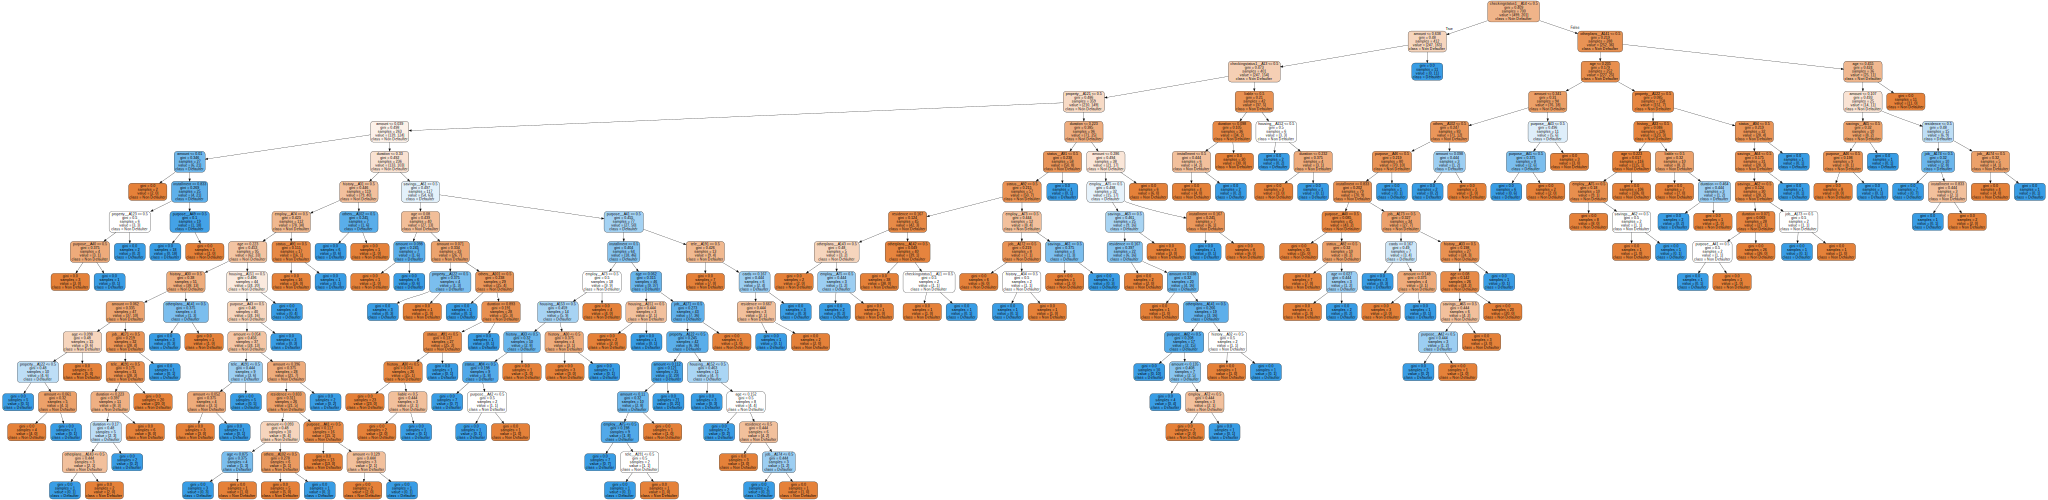

In [107]:
graph

In [108]:
graph.render('dcsn')

'dcsn.pdf'

In [109]:
#Note gini index - the measure of impurity is decreasing as we are going down, as the nodes are getting purer.

In [110]:
pwd()

'C:\\Users\\Vaibhav\\Desktop\\03June\\DataSciencePy\\Supervised_Learning\\Classification'

In [111]:
## pruning -- limiting the growth of the tree

In [112]:
#prune the tree
dt_prune = tree.DecisionTreeClassifier(min_samples_leaf = 15 , min_samples_split = 45, random_state=2)

#min_samples_leaf ---> minimum no. of samples required at a node to qualify as a terminal node ---> 2 - 3% data
#min_samples_split ---> minimum no. of samples required at a node for it to go for a split --> 3 times 
#either the node has achieved the purest form or it can't be further divided since min samples required not there. 
#and node will be qualified as leaf node if it has min 15 samples, other-wise it will be discarded, 
#and the parent node will be the leaf. 
dt_prune.fit(train.drop("Default",axis=1),train["Default"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=45,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [113]:
dt_prune.tree_

In [114]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt_prune, out_file = None,
                                feature_names = train.drop("Default",axis=1).columns, 
                                class_names= ['Non Defaulter','Defaulter'],
                                
                                filled=True, rounded=True)  
graph = graphviz.Source(dot_data) 

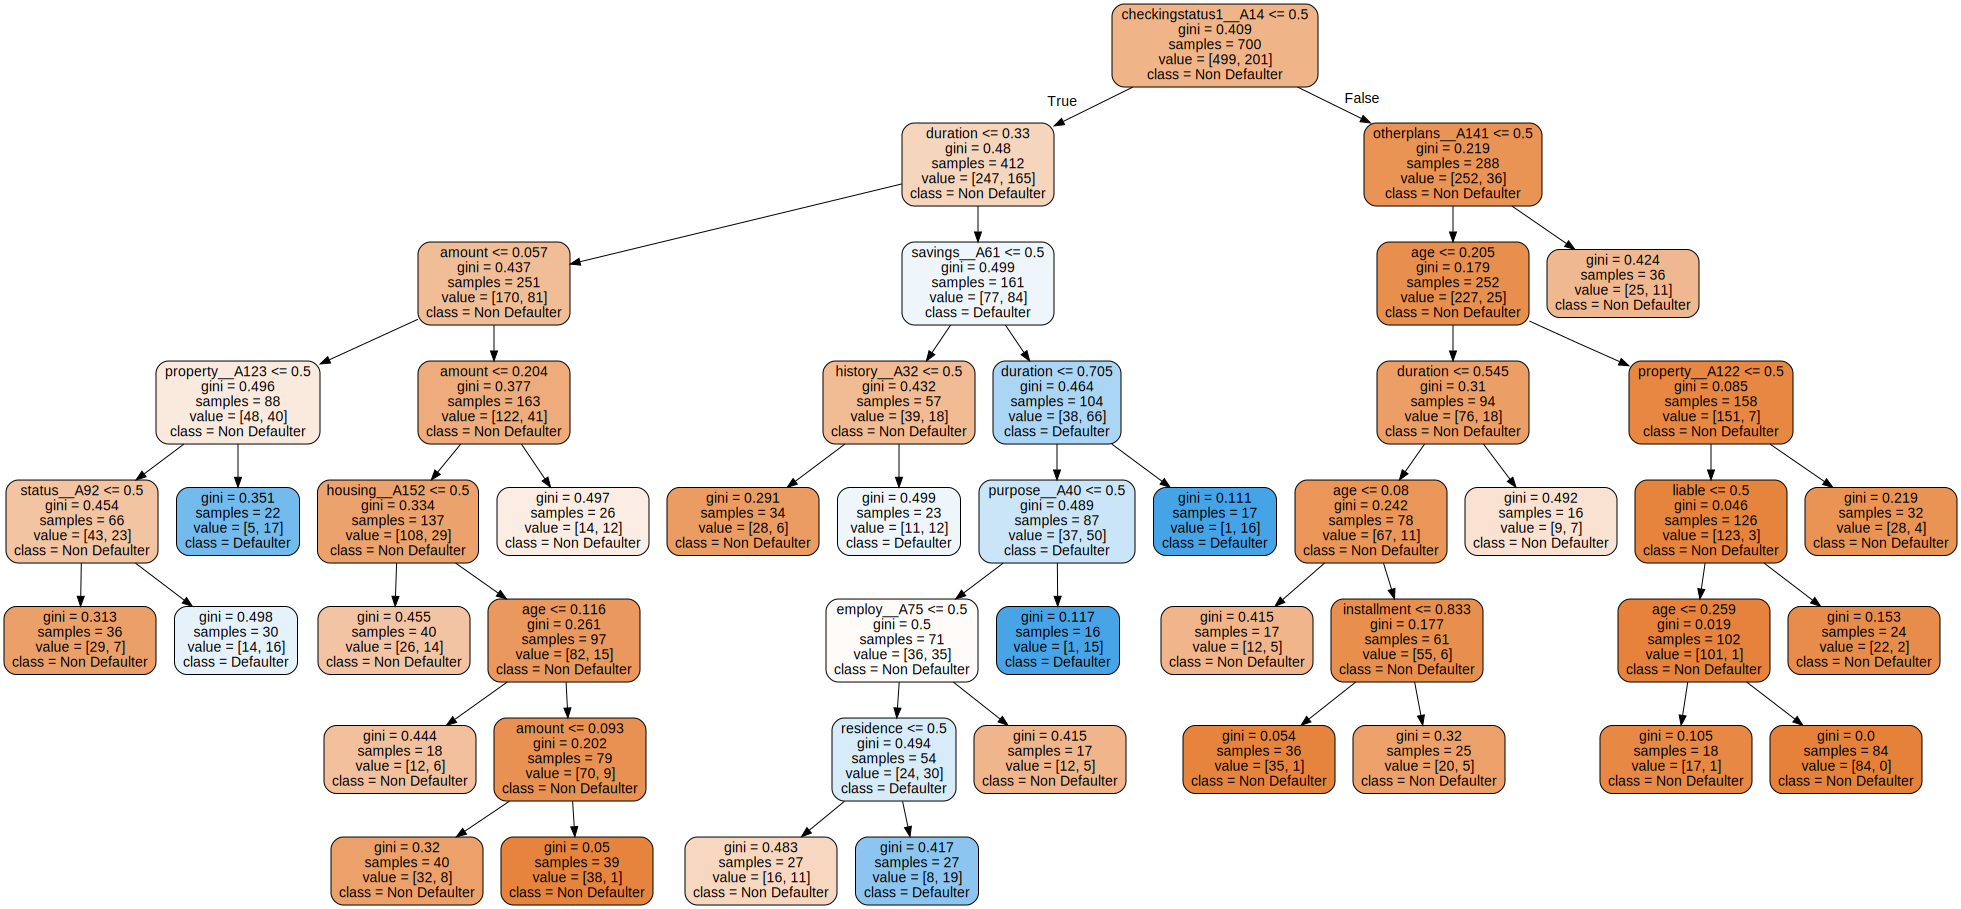

In [115]:
graph

In [116]:
graph.render('dcsn_prune')

'dcsn_prune.pdf'

In [117]:
#?tree.export_graphviz

In [118]:
data = pd.Series(dt_prune.feature_importances_, index=train.drop('Default',axis = 1).columns)
data[:3]

duration       0.155453
amount         0.096453
installment    0.009771
dtype: float64

In [119]:
data =  data.sort_values(ascending = False)
#so it will be in this order amount, installment, duration; amount of the highest importance;

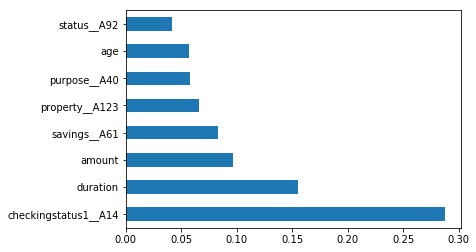

In [120]:
data[:8].plot.barh()

In [121]:
test['y_pred'] = dt_prune.predict(test.drop(['Default','y_pred'],axis = 1))

In [122]:
test.head()

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A11,checkingstatus1__A12,...,housing__A153,job__A171,job__A172,job__A173,job__A174,tele__A191,tele__A192,foreign__A201,foreign__A202,y_pred
0,1.0,0.250000,0.101794,1.000000,0.333333,0.321429,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.196429,0.058655,0.333333,0.333333,0.500000,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.250000,0.358259,0.333333,1.000000,0.875000,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.785714,0.534280,0.000000,0.333333,0.125000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1.0,0.357143,0.364367,0.333333,0.000000,0.642857,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [123]:
pd.crosstab(test.y_pred,test.Default)

Default,0.0,1.0
y_pred,,
0.0,169,58
1.0,32,41


In [124]:
test.drop("y_pred", axis = 1, inplace = True)

#### Implementing RandomizedSearchCV

In [125]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'max_features':np.random.randint(1,9,9),'min_samples_leaf': [.12,.14,.16,.18]} #max_dept
grid = RandomizedSearchCV(dt_prune, parameters, cv = 10, scoring = 'accuracy')

In [126]:
dt_prune.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 15,
 'min_samples_split': 45,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 2,
 'splitter': 'best'}

In [127]:
grid.fit(train.drop("Default",axis=1),train["Default"])

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=45,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': array([6, 8, 8, 1, 5, 4, 7, 3, 6]), 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [128]:
grid.best_params_ #best parameter of depth

{'min_samples_leaf': 0.12, 'max_features': 3, 'max_depth': 1}

In [129]:
grid.best_score_ #R2 for the best model 
#r2 bw 0 to 1 
#make the prediction on test data

0.7128571428571429

----

# K Nearest Neighbor 

In [130]:
from sklearn import preprocessing as pp

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
train.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A11,checkingstatus1__A12,...,housing__A152,housing__A153,job__A171,job__A172,job__A173,job__A174,tele__A191,tele__A192,foreign__A201,foreign__A202
0,0.0,0.142857,0.020249,1.0,1.000000,0.660714,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.035714,0.071146,1.0,0.333333,0.250000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [133]:
train.shape,test.shape

((700, 62), (300, 62))

In [134]:
cont_vars = ['duration', 'amount', 'installment', 'residence', 'age', 'cards', 'liable']

range(start, stop, step)

In [135]:
for k_value in range(1,30,2): #odd values of k
    neigh = KNeighborsClassifier(n_neighbors = k_value)
    neigh.fit(train[cont_vars],train["Default"]) 
    y_pred = neigh.predict(test[cont_vars])
    print ("Accuracy is {} for K-Value:{}".format(\
        round(accuracy_score(test["Default"],y_pred)*100,2),k_value))

Accuracy is 56.0 for K-Value:1
Accuracy is 60.67 for K-Value:3
Accuracy is 59.33 for K-Value:5
Accuracy is 61.67 for K-Value:7
Accuracy is 65.0 for K-Value:9
Accuracy is 65.33 for K-Value:11
Accuracy is 65.0 for K-Value:13
Accuracy is 66.33 for K-Value:15
Accuracy is 66.0 for K-Value:17
Accuracy is 67.0 for K-Value:19
Accuracy is 67.0 for K-Value:21
Accuracy is 66.33 for K-Value:23
Accuracy is 67.0 for K-Value:25
Accuracy is 67.67 for K-Value:27
Accuracy is 67.33 for K-Value:29


In [136]:
import numpy as np
list(np.logspace(-5,8,15))

[1e-05,
 8.483428982440725e-05,
 0.0007196856730011522,
 0.006105402296585327,
 0.05179474679231213,
 0.4393970560760795,
 3.727593720314938,
 31.622776601683793,
 268.2695795279727,
 2275.845926074791,
 19306.977288832535,
 163789.3706954068,
 1389495.494373136,
 11787686.347935867,
 100000000.0]

In [137]:
acc_score=[]
for k in range(1,30,2):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    knn.fit(train[cont_vars],train.Default)
    score=accuracy_score(test.Default, knn.predict(test[cont_vars]))
    acc_score.append(score.mean())
print(acc_score)

[0.56, 0.6066666666666667, 0.5933333333333334, 0.6166666666666667, 0.65, 0.6533333333333333, 0.65, 0.6633333333333333, 0.66, 0.67, 0.67, 0.6633333333333333, 0.67, 0.6766666666666666, 0.6733333333333333]


In [138]:
dummy = pd.DataFrame({'k': list(range(1,30,2)), 'accuracy': acc_score})
dummy

,k,accuracy
0,1,0.560000
1,3,0.606667
2,5,0.593333
3,7,0.616667
4,9,0.650000
5,11,0.653333
6,13,0.650000
7,15,0.663333
8,17,0.660000
9,19,0.670000


In [139]:
dummy[dummy.accuracy==max(dummy.accuracy)].k

13    27
Name: k, dtype: int64

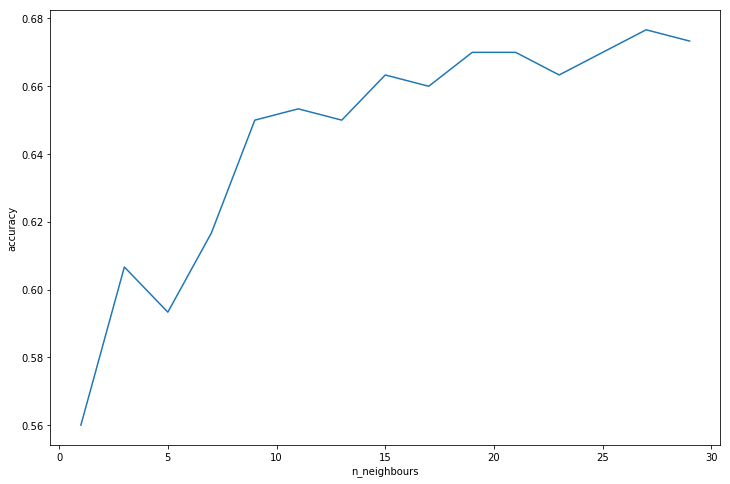

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(range(1,30,2),acc_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))
plt.show()

In [141]:
## final model
neigh = KNeighborsClassifier(n_neighbors = 27)
neigh.fit(train,train["Default"]) 
y_pred = neigh.predict(test)

In [142]:
## confusion matrix 
## classification report
print(classification_report(test["Default"],y_pred,digits = 3))

             precision    recall  f1-score   support

        0.0      0.813     0.995     0.895       201
        1.0      0.981     0.535     0.693        99

avg / total      0.869     0.843     0.828       300



In [143]:
pd.crosstab(y_pred,test["Default"])

Default,0.0,1.0
row_0,,
0.0,200,46
1.0,1,53
